In [24]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

def wage_eq(w, *args):
    alpha, k , z, b, t, h = args[0]
    nd = ((1-alpha)*z/w)**(1/alpha)*k
    pi = z * k**alpha * (nd)**(1-alpha) - w * nd
    ns = h - b/(w * (1 +b)) * (w *h + pi - t)
    return ns - nd

In [33]:
def first_order(kpivot, kgrid, params):
    params = params.copy()
    params[1] = kpivot
    wbar = opt.fsolve(wage_eq, x0 = 0.5, args = (params))
    fw = (wage_eq(wbar + 1e-6, params) - wage_eq(wbar - 1e-6, params))/(2 * 1e-6)
    params1, params2 = params.copy(), params.copy()
    params1[1] += 1e-6
    params2[1] -= 1e-6
    fk = (wage_eq(wbar, params1) - wage_eq(wbar, params2))/(2 * 1e-6)
    
    xu = -fw/fk
    
    wgrid = wbar + xu * (kgrid - kpivot)
    return wgrid

def fx(kpivot, wbar, params):
    params = params.copy()
    params1, params2 = params.copy(), params.copy()
    params1[1] += 1e-6
    params2[1] -= 1e-6
    fk = (wage_eq(wbar, params1) - wage_eq(wbar, params2))/(2 * 1e-6)
    return fk

def fu(kpivot, wbar, params):
    fw = (wage_eq(wbar + 1e-6, params) - wage_eq(wbar - 1e-6, params))/(2 * 1e-6)
    return fw

def second_order(kpivot, kgrid, params):
    params = params.copy()
    params1, params2 = params.copy(), params.copy()
    params1[1] += 1e-6
    params2[1] -= 1e-6
    wbar = opt.fsolve(wage_eq, x0 = 0.5, args = (params))
    fk = fx(kpivot, wbar, params)
    fw = fu(kpivot, wbar, params)
    fkk = (fx(kpivot, wbar, params1) - fx(kpivot, wbar, params2))/(2 * 1e-6)
    fkw = (fu(kpivot, wbar, params1) - fu(kpivot, wbar, params2))/(2 * 1e-6)
    fww = (fu(kpivot, wbar + 1e-6, params) - fu(kpivot, wbar - 1e-6, params))/(2 * 1e-6)
    xu = -fw/fk
    xuu = -(fkk * xu**2 + 2 * fkw * xu + fww)/(fk)
    
    wgrid = wbar + xu * (kgrid - kpivot) + 2 * xuu * (kgrid - kpivot)**2
    return wgrid

In [34]:
params = np.array([0.33, 5.0, 1.0, 2.0, .1, 24.0])
wbar = opt.fsolve(wage_eq, x0 = 0.5, args = (params))
kgrid = np.linspace(5, 15, 100)

In [39]:
kpivot = 5.0
wgrid_first = first_order(kpivot, kgrid, params)
wgrid_second = second_order(kpivot, kgrid, params)

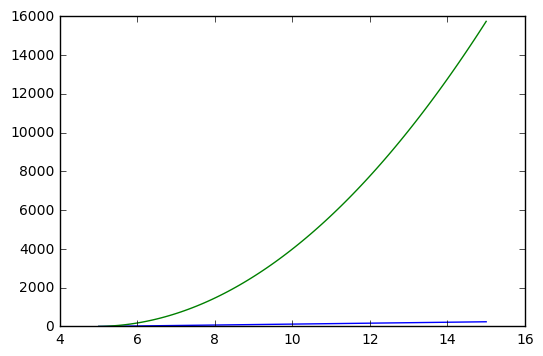

In [40]:
plt.plot(kgrid, wgrid_first)
plt.plot(kgrid, wgrid_second)
plt.show()

In [41]:
kpivot = 10.0
wgrid_first = first_order(kpivot, kgrid, params)
wgrid_second = second_order(kpivot, kgrid, params)

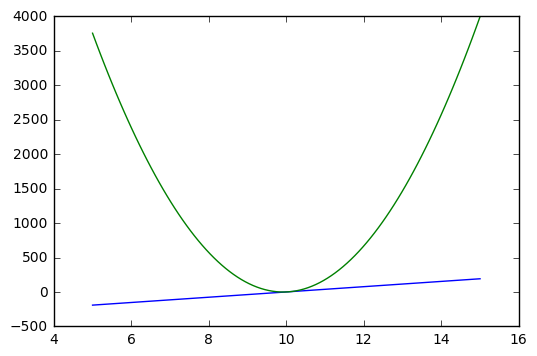

In [42]:
plt.plot(kgrid, wgrid_first)
plt.plot(kgrid, wgrid_second)
plt.show()